# The scores are creating using:

- R = days since last transaction at the end of each month
- F = Number of transactions in the time period
- M = Money spent in the time period (Revenue would be a better parameter)




- RFM_Score = Quality score of Customers

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
retail = pd.read_excel("retail_dataset.xlsx")
df = retail.copy()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Data Preprocessing

In [3]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## Missing value fix

In [4]:
df = df.dropna()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null datetime64[ns]
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [6]:
df.reset_index(drop = True, inplace=True)
df.index

RangeIndex(start=0, stop=406829, step=1)

## Outliers fix

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.0,13953.00,15152.00,16791.00,18287.0


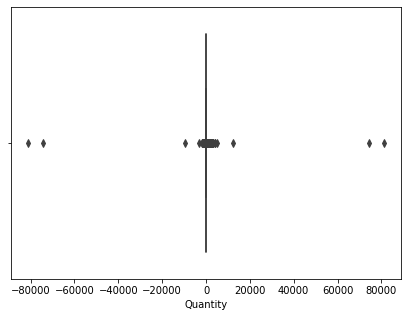

In [8]:
plt.figure(figsize = (7,5))
sns.boxplot(df["Quantity"]);

In [9]:
df = df[(df["Quantity"] > 0) & (df["Quantity"] < 10000)]

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,397921.0,12.600355,42.889024,1.0,2.00,6.00,12.00,4800.00
UnitPrice,397921.0,3.116190,22.096870,0.0,1.25,1.95,3.75,8142.75
CustomerID,397921.0,15294.324808,1713.165940,12347.0,13969.00,15159.00,16795.00,18287.00


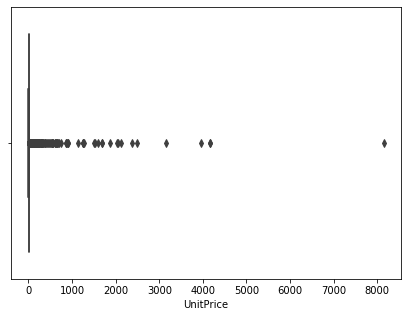

In [11]:
plt.figure(figsize = (7,5))
sns.boxplot(df["UnitPrice"]);

In [12]:
df = df[(df["UnitPrice"] > 0) & (df["UnitPrice"] < 3000)]

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,397877.0,12.598358,42.886253,1.000,2.00,6.00,12.00,4800.0
UnitPrice,397877.0,3.057295,13.068141,0.001,1.25,1.95,3.75,2500.0
CustomerID,397877.0,15294.445876,1713.132919,12347.000,13969.00,15159.00,16795.00,18287.0


# RFM Analysis

In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [15]:
# Creating Total Price column

df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

In [16]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## Recency

In [17]:
import datetime as dt

In [18]:
df["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [19]:
last_date = df["InvoiceDate"].max() + dt.timedelta(days = 1)

In [20]:
last_date

Timestamp('2011-12-10 12:50:00')

In [21]:
recency = df.groupby("CustomerID")["InvoiceDate"].apply(lambda x : (last_date - x.max()).days)

In [22]:
recency

CustomerID
12347.0      2
12348.0     75
12349.0     19
12350.0    310
12352.0     36
          ... 
18280.0    278
18281.0    181
18282.0      8
18283.0      4
18287.0     43
Name: InvoiceDate, Length: 4337, dtype: int64

## Frequency

In [23]:
frequency = df.groupby("CustomerID")["InvoiceNo"].count()

In [24]:
frequency

CustomerID
12347.0    182
12348.0     31
12349.0     73
12350.0     17
12352.0     85
          ... 
18280.0     10
18281.0      7
18282.0     12
18283.0    756
18287.0     70
Name: InvoiceNo, Length: 4337, dtype: int64

# Monetary

In [25]:
monetary = df.groupby("CustomerID")["TotalPrice"].sum()

In [26]:
monetary

CustomerID
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
12352.0    2506.04
            ...   
18280.0     180.60
18281.0      80.82
18282.0     178.05
18283.0    2094.88
18287.0    1837.28
Name: TotalPrice, Length: 4337, dtype: float64

In [27]:
rfm_data = pd.concat([recency, frequency, monetary], axis = 1)

In [28]:
rfm_data

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
12352.0,36,85,2506.04
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


In [29]:
# rename columns
rfm_data.rename(columns= {"InvoiceDate" : "Recency",
                          "InvoiceNo" : "Frequency", 
                          "TotalPrice" : "Monetary"}, inplace=True)

In [30]:
rfm_data.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
12352.0,36,85,2506.04


## Cut values with labels
- Customers with the lowest recency, highest frequency and monetary amounts considered as top customers

In [31]:
r_labels = range(5,0,-1)
f_labels = range(1,6)
m_labels = range(1,6)

In [32]:
r_groups = pd.qcut(rfm_data["Recency"],q = 5, labels=r_labels)
f_groups = pd.qcut(rfm_data["Frequency"], q = 5, labels = f_labels)
m_groups = pd.qcut(rfm_data["Monetary"], q = 5, labels = m_labels)

In [33]:
rfm_data["R"] = r_groups.values
rfm_data["F"] = f_groups.values
rfm_data["M"] = m_groups.values

In [34]:
rfm_data

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12347.0,2,182,4310.00,5,5,5
12348.0,75,31,1797.24,2,3,4
12349.0,19,73,1757.55,4,4,4
12350.0,310,17,334.40,1,2,2
12352.0,36,85,2506.04,3,4,5
...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1
18281.0,181,7,80.82,1,1,1
18282.0,8,12,178.05,5,1,1


In [35]:
# combine labels for score
def join_func(x):
    return str(x["R"]) + str(x["F"]) + str(x["M"])

In [36]:
rfm_data["RFM_Score"] = rfm_data.apply(join_func, axis = 1)

In [37]:
rfm_data.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Score
CustomerID,,,,,,,
12347.0,2,182,4310.00,5,5,5,555
12348.0,75,31,1797.24,2,3,4,234
12349.0,19,73,1757.55,4,4,4,444
12350.0,310,17,334.40,1,2,2,122
12352.0,36,85,2506.04,3,4,5,345


In [38]:
# sort by Top/Best customers
rfm_data.sort_values(by = "RFM_Score", ascending = False)

,Recency,Frequency,Monetary,R,F,M,RFM_Score
CustomerID,,,,,,,
12347.0,2,182,4310.00,5,5,5,555
13426.0,1,157,3641.32,5,5,5,555
16873.0,5,279,7123.62,5,5,5,555
13536.0,1,179,3448.29,5,5,5,555
13534.0,2,296,5870.08,5,5,5,555
...,...,...,...,...,...,...,...
13101.0,234,8,101.19,1,1,1,111
17394.0,219,4,203.87,1,1,1,111
13120.0,239,1,30.60,1,1,1,111
